# Creación manual de RNA


In [1]:
class SimpleClass():
    
    def __init__(self,str_input):
        print("SIMPLE"+str_input)

In [2]:
 j = SimpleClass('jj está hoy')
    

SIMPLEjj está hoy


In [3]:
class ExtendedClass(SimpleClass):
    
    def __init__(self):
        print('EXTENDED')

In [4]:
s = ExtendedClass()

EXTENDED


In [5]:
class ExtendedClass(SimpleClass):
    
    def __init__(self, otra_cadena):
        
        super().__init__(otra_cadena)
        print('EXTENDED', otra_cadena)

In [6]:
s = ExtendedClass('eere')

SIMPLEeere
EXTENDED eere


________

## Operation

In [7]:
class Operation():
    """
    An Operation is a node in a "Graph". TensorFlow will also use this concept of a Graph.
    
    This Operation class will be inherited by other classes that actually compute the specific
    operation, such as adding or matrix multiplication.
    """
    
    def __init__(self, input_nodes = []):
        """
        Intialize an Operation
        """
        self.input_nodes = input_nodes # The list of input nodes
        self.output_nodes = [] # List of nodes consuming this node's output
        
        # For every node in the input, we append this operation (self) to the list of
        # the consumers of the input nodes
        for node in input_nodes:
            node.output_nodes.append(self)
        
        # There will be a global default graph (TensorFlow works this way)
        # We will then append this particular operation
        # Append this operation to the list of operations in the currently active default graph
        _default_graph.operations.append(self)
  
    def compute(self):
        """ 
        This is a placeholder function. It will be overwritten by the actual specific operation
        that inherits from this class.
        
        """
        
        pass

## Example Operations

### Addition

In [8]:
class add(Operation):
    
    def __init__(self, x, y):
         
        super().__init__([x, y])

    def compute(self, x_var, y_var):
         
        self.inputs = [x_var, y_var]
        return x_var + y_var

### Multiplication

In [9]:
class multiply(Operation):
     
    def __init__(self, a, b):
        
        super().__init__([a, b])
    
    def compute(self, a_var, b_var):
         
        self.inputs = [a_var, b_var]
        return a_var * b_var

### Matrix Multiplication

In [10]:
class matmul(Operation):
     
    def __init__(self, a, b):
        
        super().__init__([a, b])
    
    def compute(self, a_mat, b_mat):
         
        self.inputs = [a_mat, b_mat]
        return a_mat.dot(b_mat)

## Placeholders

In [11]:
class Placeholder():
    """
    A placeholder is a node that needs to be provided a value for computing the output in the Graph.
    """
    
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

## Variables

In [12]:
class Variable():
    """
    This variable is a changeable parameter of the Graph.
    """
    
    def __init__(self, initial_value = None):
        
        self.value = initial_value
        self.output_nodes = []
        
         
        _default_graph.variables.append(self)

## Graph

In [13]:
class Graph():
    
    
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        """
        Sets this Graph instance as the Global Default Graph
        """
        global _default_graph
        _default_graph = self

## A Basic Graph

$$ z = Ax + b $$

With A=10 and b=1

$$ z = 10x + 1 $$

Just need a placeholder for x and then once x is filled in we can solve it!

In [14]:
g = Graph()

In [15]:
g.set_as_default()

In [16]:
A = Variable(10)

In [17]:
b = Variable(1)

In [18]:
x = Placeholder()

In [19]:
y = multiply(A,x)

In [20]:
z = add(y,b)

## Session

In [21]:
import numpy as np

### Traversing Operation Nodes

In [22]:
def traverse_postorder(operation):
        
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [23]:
class Session:
    
    def run(self, operation, feed_dict = {}):
       
        
        # Puts nodes in correct order
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:

            if type(node) == Placeholder:
                
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                
                node.output = node.value
                
            else: # Operation
                
                node.inputs = [input_node.output for input_node in node.input_nodes]

                 
                node.output = node.compute(*node.inputs)
                
            # Convert lists to numpy arrays
            if type(node.output) == list:
                node.output = np.array(node.output)
        
        # Return the requested node value
        return operation.output




In [24]:
ss = Session()

In [25]:
res = ss.run(operation = z, feed_dict={x:10})

In [26]:
res


101

In [27]:
res = ss.run(operation = z, feed_dict={x:100})
res

1001

In [28]:
g = Graph()

In [29]:
g.set_as_default()

In [30]:
A = Variable([[10,20],[100,200]])

In [31]:
b = Variable([6,4])

In [32]:
x = Placeholder()

In [33]:
y = matmul(A, x)

In [34]:
z = add(y, b)

In [35]:
ss2 = Session()

In [36]:
rrr = ss2.run( operation = z , feed_dict={x : 10} )

In [37]:
rrr

array([[ 106,  204],
       [1006, 2004]])

## funcion de activación

In [38]:
import matplotlib.pyplot as plt

In [39]:
%matplotlib inline

In [40]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
    

In [41]:
xx = np.linspace(-5, 5, 50)

In [42]:
yy = sigmoid(xx)

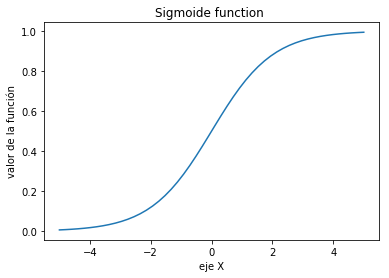

In [43]:
plt.plot(xx, yy)
plt.xlabel('eje X')
plt.title('Sigmoide function ')
plt.ylabel('valor de la función')

In [44]:
class Sigmoid(Operation):
    def __init__(self, z):
        super().__init__([z])
        
    def compute(self, x):
        return 1/(1+np.exp(-x))

In [80]:
from sklearn.datasets import make_blobs 

In [182]:
datos = make_blobs (n_samples = 150, n_features = 2, 
                    centers = 2, random_state = 75, cluster_std=1.0)

#X, y = make_blobs(n_samples=100, centers=3, n_features=2,
#                   random_state=70)

In [183]:
type(datos)

tuple

In [184]:
datosX = datos[0]

In [185]:
etiquetas = datos[1]

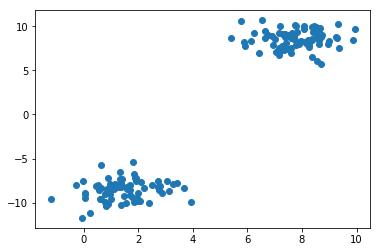

In [186]:
plt.scatter(datosX[:, 0], datosX[:, 1] )

In [187]:
x = np.linspace(-2, 11, 30)

In [188]:
y = -3*x +8

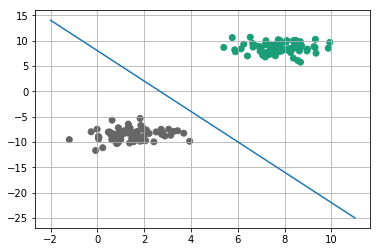

In [189]:
plt.scatter(datosX[:, 0], datosX[:, 1], c = etiquetas, cmap = 'Dark2_r' )
plt.plot(x,y)
plt.grid()

# evaluación de puntos 
Si 
$$ (x_i,y_i)  > y = -3*x +8 $$ 
entonces el punto es de una clase por decir 1 

Vamos a introducir un punto (X,Y) y será evaluado por el clasificador, debe indicar alguna clase

In [190]:
yy = np.array([2,1]).dot( np.array([ 8,9 ]))+6
yy

31

In [191]:
g = Graph()

In [192]:
g.set_as_default()

In [193]:
x = Placeholder()

In [194]:
w = Variable([1,1])
b = Variable(8)
z = add(matmul(w,x), b)
s = Sigmoid(z)

In [197]:
ss = Session()
ss.run(operation = s, feed_dict={x:[-10, 2]})

0.5